In [1]:
# Make sure we are in the `deep-radar` directory.
import os

if os.getcwd().endswith("notebooks"):
    os.chdir("..")
print("cwd:", os.getcwd())

cwd: /home/tianshu/Documents/RadarML/deep-radar


In [2]:
from beartype.typing import Optional
from matplotlib import pyplot as plt

import analysis

results = analysis.Results("results")


def compare(
    methods: list[str], method_names: list[str], splits: dict[str, str],
    metric: str = "bev_loss", title: Optional[str] = None,
    cmap: str = "coolwarm"
):
    compared = {
        k: results.compare(methods, key=metric, pattern=v)
        for k, v in splits.items()}

    size = 0.75 * len(methods)
    figsize = (1.5 + len(compared) * size, 1.5 + 1.5 * size)
    fig, axs = plt.subplots(3, len(compared), figsize=figsize)
    axs = axs.reshape(3, len(compared))

    analysis.comparison_grid(
        axs, compared, method_names, aspect='auto', shortnames=True, cmap=cmap)

    for (k, v), row in zip(compared.items(), axs.T):
        # ess = v.diff.ess
        # ess_max = np.nanmax(ess.reshape(ess.shape[0], -1), axis=1)
        # discount = np.sum(v.diff.n) / np.sum(ess_max)

        row[-1].set_xlabel(k)
        # row[-1].set_xlabel(f"{k}\nESS = {discount:.0f}x")

    if title is not None:
        fig.suptitle(title)
    fig.tight_layout()

    return fig, axs, compared


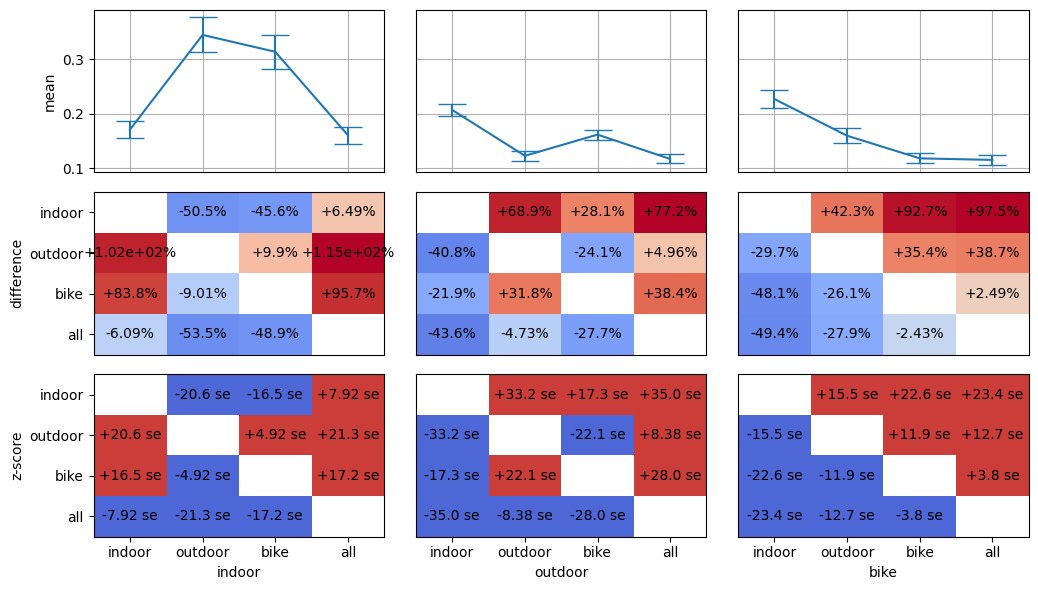

In [3]:
methods = ["small/indoor", "small/outdoor", "small/bike", "small/base"]
method_names = ["indoor", "outdoor", "bike", "all"]
metric = "map_loss"
splits = {"indoor": "^indoor", "outdoor": "^outdoor", "bike": "^bike"}

fig, axs, compared = compare(
    methods=methods, method_names=method_names, splits=splits,
    metric="map_loss")
